## Read arc_times

In [1]:
import pandas as pd

arc_timesfile = '/data/SatDragModelValidation/data/inputs/sat_icesat2/arc_times.txt'


### Make a function that finds the right range of dates in this file.
arcs = pd.read_csv(arc_timesfile, 
            sep = ',',
#             dtype=object,
            names = [
                'arc'         ,
                'epoch_start' ,
                'epoch_stop'  ,
                'orbit_start' ,
                'orbit_stop'  ,
                    ],)


arcs_yyyyddd = [x.strip() for x in arcs['arc'].values.tolist()]
epochstart   = [x.strip() for x in arcs['orbit_start'].values.tolist()]
epochstop    = [x.strip() for x in arcs['orbit_stop' ].values.tolist()]


# month_list = ['oct', 'nov', 'dec']
month_list = ['nov']
for imonth,month in enumerate(month_list):
    if month=='oct':
        m_num = 10
    if month=='nov':
        m_num = 11
    if month=='dec':
        m_num = 12
    
    input_arcs       = []
    input_epochstart = []
    input_epochstop  = []
    arc_length = []
    scaleparameter_times = []
    
    for i,val in enumerate(arcs_yyyyddd):
        if pd.to_datetime(val[:8],format="%Y.%j").month == m_num:
            epoch_delta  =  pd.to_timedelta(pd.to_datetime(epochstop[i]) - pd.to_datetime(epochstart[i]), 'hours')
            arc_length.append(epoch_delta.total_seconds()/3600)

            if val[8:] == 'A' or val[8:] == 'B':
                input_arcs.append(      arcs_yyyyddd[i])
                input_epochstart.append(epochstart[i])
                input_epochstop.append( epochstop[i])
                scaleparameter_times.append([''])
            else:
                ### use 24-hour start/stop
                input_arcs.append(      arcs_yyyyddd[i])
                input_epochstart.append(str(pd.to_datetime(arcs_yyyyddd[i],format="%Y.%j")))
                input_epochstop.append( str(pd.to_datetime(arcs_yyyyddd[i],format="%Y.%j")+ pd.to_timedelta(24,'h')))
                
                ### Use Arc text file times
#                 input_arcs.append(      arcs_yyyyddd[i])
#                 input_epochstart.append(epochstart[i])
#                 input_epochstop.append( epochstop[i])
#                 scalestart = str(pd.to_datetime(arcs_yyyyddd[i],format="%Y.%j"))
#                 scalestop  = str(pd.to_datetime(arcs_yyyyddd[i],format="%Y.%j") + pd.to_timedelta(24,'h'))
#                 scaleparameter_times.append(pd.date_range(start = pd.to_datetime(scalestart),
#                                                           end   = pd.to_datetime(scalestop ),
#                                                           freq=str(24)+"H"))
    
    if month=='dec':
        input_arcs       = input_arcs[:-1] 
        input_epochstart = input_epochstart[:-1] 
        input_epochstop  = input_epochstop[:-1] 
    

# 7:24 

    
# for i,val in enumerate(input_arcs[7:12]):
#     print(f" {input_arcs[7:12][i]:10}  , {input_epochstart[7:12][i]:20},  {input_epochstop[7:12][i]:20}, {arc_length[7:12][i]}")
#     if val[8:] == 'A' or val[8:] == 'B':
#         print("")

#     else:
#         print(f" {'':10}  , {scaleparameter_times[7:12][i]}")
#         print("")
    
    



## Run geodyn

In [2]:
from pygeodyn.PYGEODYN import Pygeodyn
import datetime


run_list = [
                'dtm2020_o',
                'jb2008',
                'msis2',
#                 'manual_dtm2020_o',
#                 'manual_jb2008',
#                 'manual_msis2',
#                 'manual_ensembleWgtAvg',
           ]

month_list = ['nov']


dir_modeldat='/data/SatDragModelValidation/data/inputs/atmos_models'
run_dict={}
for i in run_list:
    for imonth,month in enumerate(month_list):

        if i =='manual_ensembleWgtAvg':
            run_dict[month+i]={}
            run_dict[month+i]['num'] = 1
            run_dict[month+i]['model_path'] = '/data/SatDragModelValidation/data/outputs_clean/icesat2/'\
                                      + "O2R2023_longimeperiod/AGU2023/" \
                                      + 'ScaledRho_24hrArcs_manualensembleWgtAvg.txt'

        if i =='manual_jb2008':
            run_dict[month+i]={}
            run_dict[month+i]['num'] = 1
            run_dict[month+i]['model_path'] = '/data/SatDragModelValidation/data/outputs_clean/icesat2/'\
                                      + "O2R2023_longimeperiod/AGU2023/" \
                                      + 'ScaledRho_24hrArcs_manualnovjb2008.txt'
        if i =='manual_dtm2020_o':
            run_dict[month+i]={}
            run_dict[month+i]['num'] = 3
            run_dict[month+i]['model_path'] = '/data/SatDragModelValidation/data/outputs_clean/icesat2/'\
                                      + "O2R2023_longimeperiod/AGU2023/" \
                                      + 'ScaledRho_24hrArcs_manualnovdtm2020_o.txt'
        if i =='manual_msis2':
            run_dict[month+i]={}
            run_dict[month+i]['num'] = 5
            run_dict[month+i]['model_path'] = '/data/SatDragModelValidation/data/outputs_clean/icesat2/'\
                                      + "O2R2023_longimeperiod/AGU2023/" \
                                      + 'ScaledRho_24hrArcs_manualnovmsis2.txt'

        if i =='jb2008':
            run_dict[month+i]={}
            run_dict[month+i]['num'] = 1
            run_dict[month+i]['model_path'] = '/data/SatDragModelValidation/data/outputs_clean/icesat2/'\
                                      + "O2R2023_longimeperiod/AGU2023/" \
                                      + 'ScaledRho_24hrArcs_manualnovjb2008.txt'
        if i =='dtm2020_o':
            run_dict[month+i]={}
            run_dict[month+i]['num'] = 3
            run_dict[month+i]['model_path'] = '/data/SatDragModelValidation/data/outputs_clean/icesat2/'\
                                      + "O2R2023_longimeperiod/AGU2023/" \
                                      + 'ScaledRho_24hrArcs_manualnovdtm2020_o.txt'
        if i =='msis2':
            run_dict[month+i]={}
            run_dict[month+i]['num'] = 5
            run_dict[month+i]['model_path'] = '/data/SatDragModelValidation/data/outputs_clean/icesat2/'\
                                      + "O2R2023_longimeperiod/AGU2023/" \
                                      + 'ScaledRho_24hrArcs_manualnovmsis2.txt'



# for i,den in enumerate(run_list):
#     print(run_dict[den])

In [3]:
%load_ext autoreload
%autoreload 2
from gc import collect as gc_collect
import pickle 
import os

# file_raw_ICs = f"/data/SatDragModelValidation/data/inputs/sat_icesat2/g2b/"\
#           +"ICESat2_RawEphem_2018_10.txt"

# g2b_path = "/data/SatDragModelValidation/data/inputs/sat_icesat2/g2b/"
# dir_save    =  '/data/SatDragModelValidation/data/outputs_clean/'\
#              + 'icesat2/O2R2023_longimeperiod/1_DRIAruns/'

g2b_path = "/data/SatDragModelValidation/data/inputs/sat_icesat2/g2b/"
dir_save    =  '/data/SatDragModelValidation/data/outputs_clean/'\
             + 'icesat2/O2R2023_longimeperiod/AGU2023/'


test_index = 24

obj = {}

for imonth,month in enumerate(month_list):
    if month=='oct':
        m_num = 10
    if month=='nov':
        m_num = 11
    if month=='dec':
        m_num = 12
    if month=='jan':
        m_num = 1
    if month=='feb':
        m_num = 2
    if month=='mar':
        m_num = 3
    if month=='apr':
        m_num = 4

#     file_raw_ICs = f"{g2b_path}ICESat2_RawEphem_2018_{m_num}.txt"
#     file_g2b     = f"pce_icesat2_pso_2018_{m_num}"
    file_raw_ICs = f"{g2b_path}ICESat2_RawEphem_2018_{m_num:02d}.txt"
    file_g2b     = f"pce_icesat2_pso_2018_{m_num:02d}"

    input_arcs       = []
    input_epochstart = []
    input_epochstop  = []
    arc_length = []
    scaleparameter_times = []
    
    for i,val in enumerate(arcs_yyyyddd):
        if pd.to_datetime(val[:8],format="%Y.%j").month == m_num:
            epoch_delta  =  pd.to_timedelta(pd.to_datetime(epochstop[i]) - pd.to_datetime(epochstart[i]), 'hours')
            arc_length.append(epoch_delta.total_seconds()/3600)

            if val[8:] == 'A' or val[8:] == 'B':
                input_arcs.append(      arcs_yyyyddd[i])
                input_epochstart.append(epochstart[i])
                input_epochstop.append( epochstop[i])
                scaleparameter_times.append([''])
            else:
                ### use 24-hour start/stop
                input_arcs.append(      arcs_yyyyddd[i])
                input_epochstart.append(str(pd.to_datetime(arcs_yyyyddd[i],format="%Y.%j")))
                input_epochstop.append( str(pd.to_datetime(arcs_yyyyddd[i],format="%Y.%j")+ pd.to_timedelta(24,'h')))
                
                ### Use Arc text file times
#                 input_arcs.append(      arcs_yyyyddd[i])
#                 input_epochstart.append(epochstart[i])
#                 input_epochstop.append( epochstop[i])
#                 scalestart = str(pd.to_datetime(arcs_yyyyddd[i],format="%Y.%j"))
#                 scalestop  = str(pd.to_datetime(arcs_yyyyddd[i],format="%Y.%j") + pd.to_timedelta(24,'h'))
#                 scaleparameter_times.append(pd.date_range(start = pd.to_datetime(scalestart),
#                                                           end   = pd.to_datetime(scalestop ),
#                                                           freq=str(24)+"H"))
    if month=='dec':
        input_arcs       = input_arcs[:-1] 
        input_epochstart = input_epochstart[:-1] 
        input_epochstop  = input_epochstop[:-1] 
    
    for i,val in enumerate(input_arcs[7:test_index]):
        print(f" {input_arcs[7:test_index][i]:10}  , {input_epochstart[7:test_index][i]:20},  {input_epochstop[7:test_index][i]:20}, {arc_length[7:test_index][i]}")
        if val[8:] == 'A' or val[8:] == 'B':
            print("")

        else:
#             print(f" {'':10}  , {scaleparameter_times[7:test_index][i]}")
            print("")    
    
    
    for i,den in enumerate(run_list):
        settings_icesat2= {# Basic input settings
                     'satellite'      : {'input': 'icesat2'},
                     'den_model'      : {'input': den},
                     'run_type'       : {'input': 'OrbitPropagation'},
                     'run_specifier'  : {'input': '_'+month},
                     'cd_model'       : {'input': 'BWDRAG'},
#                      'file_string'    : {'input': 'scaledProps_'},
                     'file_string'    : {'input': 'Props_'},
                     'model_data_path' : {'input': run_dict[month+den]['model_path']},
                     # Force Model settings
                      'cd_type'               : {'input':"Fixed_CD"},
                      'cd_value'              : {'input':2.500000},
                      'scaling_factor'        : {'input':False},  # this is the DRIA Scaling Factor
                      'hours_between_cd_adj'  : {'input':24},
                      #### Comment for unadjusted run:
                      'cd_adjustment_boolean' : {'input':False },
                    #### DRIA CD Model Parameters
#                     'cd_model_params' : {'input':{ 
#                             'MS'     : '26.980D0'   ,  #!  molar mass for each panel (g/mol)
#                             'TW'     : '300.0D0'    ,  #!  temperature of panels  (K)
#                                ###  Alpha is b/w 0 and 1
#                             'ALPHA'  : '0.890D0'    ,  #!  accomodation coefficient
#                             'KL'     : '0.0D0'    ,    #!  langmuir parameter
#                             'FRACOX' : '1.0D0'   ,     #!  fraction of surface covered by atomic oxygen
#                        }},
                      #### ---------------------------------------
                     # Run
                      'arc_type'       : {'input':'Nominal30hr_and_AB'},      
                      'step'           : {'input': 10.},
                      'orbfil_step'    : {'input': 120.},
                      'which_ICfile'   : {'input':file_raw_ICs},
                      'which_g2bfile'  : {'input':file_g2b},
                        #
                      'arc'            : {'input': input_arcs[7:test_index]},
                      'epoch_start'    : {'input': input_epochstart[7:test_index]},
                      'epoch_stop'     : {'input': input_epochstop[7:test_index]},  
#                 'scaleparameter_times' : {'input': scaleparameter_times[7:test_index]},  
                       #                                
                      'global_options' : {'input':'pso_2018'},
                     # Request read on raw outputs
                      'request_data'   : {'input': ['Trajectory_orbfil', 
                                                   'Density', 
#                                                    'Residuals_summary',
#                                                    'DragFile',
#                                                    'AdjustedParams'
                                                   ]},
                  #end dict
                  }




        sat = Pygeodyn(settings_icesat2, use_file=False)
#         sat.run_arcs()
#         obj[month+den] =  sat.getData_BigData_lowmemory(orbit_propagation=True)
#         obj[month+den] = vars(obj[month+den])
        gc_collect()


        pickleName = f'_{month}_24hr_orbitprops.pkl'
#         pickleName = f'_{month}_24hrensemble_orbitprops.pkl'

        pickle_file = dir_save+den+pickleName
        if not os.path.exists(pickle_file):
            print('Must create pickle file...')
            print('   ',  pickle_file)
            print('   ', 'Reading Geodyn Data')

            ### Load the data into an object
            sat = Pygeodyn(settings_icesat2, use_file=False)
            obj = sat.getData_BigData_lowmemory(orbit_propagation=True)
            gc_collect()

            #### Pickle the object to save it
            print('   ', 'Saving pickle')
            filehandler = open(pickle_file, 'wb') 
            pickle.dump(vars(obj), filehandler)
            filehandler.close()
            obj = 0
            print('   ', 'Saved pickle')

obj = {}
for i,model in enumerate(run_list):
    for imonth,month in enumerate(month_list):
#         pickleName = f'_{month}_24hrensemble_orbitprops.pkl'
        pickleName = f'_{month}_24hr_orbitprops.pkl'

        ### Load the data if the pickles exist
        print()
        print()
        gc_collect()

        pickle_file = dir_save+model+pickleName

        filehandler = open(pickle_file, 'rb') 
        obj[month+model] = pickle.load(filehandler)
        filehandler.close()
        print('Loaded data from pickle... ',  model)
    
    
### -----------------------------------------------------
### startdate = "2018-10-14"
### enddate   = "2018-11-02"  
### sat = Pygeodyn(settings_icesat2, use_file=False)
### sat.initialize_timeperiod_stage1(startdate, enddate,
###                                  overwrite_exat=False, 
###                                  overwrite_ICtext=False)
### import sys
### sys.exit(0)

 2018.312    , 2018-11-08 00:00:00 ,  2018-11-09 00:00:00 , 29.4

 2018.313    , 2018-11-09 00:00:00 ,  2018-11-10 00:00:00 , 29.4

 2018.314    , 2018-11-10 00:00:00 ,  2018-11-11 00:00:00 , 29.4

 2018.315    , 2018-11-11 00:00:00 ,  2018-11-12 00:00:00 , 29.4

 2018.316    , 2018-11-12 00:00:00 ,  2018-11-13 00:00:00 , 29.4

 2018.317    , 2018-11-13 00:00:00 ,  2018-11-14 00:00:00 , 29.4

 2018.318    , 2018-11-14 00:00:00 ,  2018-11-15 00:00:00 , 29.4

 2018.319    , 2018-11-15 00:00:00 ,  2018-11-16 00:00:00 , 29.4

 2018.320    , 2018-11-16 00:00:00 ,  2018-11-17 00:00:00 , 29.4

 2018.321    , 2018-11-17 00:00:00 ,  2018-11-18 00:00:00 , 29.4

 2018.322    , 2018-11-18 00:00:00 ,  2018-11-19 00:00:00 , 29.4

 2018.323    , 2018-11-19 00:00:00 ,  2018-11-20 00:00:00 , 29.4

 2018.324    , 2018-11-20 00:00:00 ,  2018-11-21 00:00:00 , 29.4

 2018.325    , 2018-11-21 00:00:00 ,  2018-11-22 00:00:00 , 29.4

 2018.326    , 2018-11-22 00:00:00 ,  2018-11-23 00:00:00 , 29.4

 2018.327 


Run #5          Running IIS
Run #5          No errors in IIS
Run #5 ---------End of IIS

Run #5          Running IIE
Run #5          Current Time = 08:29:42 GMT-7
 ------ Current DIR:  /data/SatDragModelValidation/data/tmp/dtm2020_o_BWDRAG_nov/icesat2_2018316_dtm2020_o.Props_
Run #5          No errors in IIE
Run #5 ---------End of IIE
Run #5          Time of IIE:  61.09026336669922 secs ( 1.0181710561116537  mins)
Run #5          Current Time = 15:30:43
Saving fort.103 as drag_file
Saving fort.104 as SatGeometry_file
Run #5                Finished renaming files
Run #5                Finished copying files to outputdir
Run #6     Current Time =      08:30:46  GMT-7
Run #6
|————————————————————————————————————————————————————————————————————————————————
| Run #6 Parameters
| —————————————————
|  Run Specs
|  --------- 
|    Satellite    icesat2
|    Run Type     OrbitPropagation
|    CD Type      Fixed_CD
|    CD Value     2.5
|    Density      dtm2020_o
|
|  Epoch Info 
|  ---------- 

Run #10                Finished copying files to outputdir
Run #11     Current Time =      08:38:37  GMT-7
Run #11
|————————————————————————————————————————————————————————————————————————————————
| Run #11 Parameters
| ——————————————————
|  Run Specs
|  --------- 
|    Satellite    icesat2
|    Run Type     OrbitPropagation
|    CD Type      Fixed_CD
|    CD Value     2.5
|    Density      dtm2020_o
|
|  Epoch Info 
|  ---------- 
|    Arc          2018.322
|    Arc length   24.0 hours
|    Epoch Start  2018-11-18 00:00:00
|    Epoch End    2018-11-19 00:00:00
|    Step Size    10.0 seconds
|
|  Files Info
|  ---------- 
|    Arc Name    icesat2_2018322_dtm2020_o.Props_
|
|    IISSET      .../data/inputs/sat_icesat2/setups/iisset.2018.322
|    EXAT        .../data/inputs/sat_icesat2/external_attitude/EXAT01.2018.322.gz
|    Output Raw  .../data/outputs_raw/icesat2/dtm2020_o/dtm2020_o_BWDRAG_nov/
|
|————————————————————————————————————————————————————————————————————————————————

Run #


Run #16          Running IIS
Run #16          No errors in IIS
Run #16 ---------End of IIS

Run #16          Running IIE
Run #16          Current Time = 08:46:37 GMT-7
 ------ Current DIR:  /data/SatDragModelValidation/data/tmp/dtm2020_o_BWDRAG_nov/icesat2_2018327_dtm2020_o.Props_
Run #16          No errors in IIE
Run #16 ---------End of IIE
Run #16          Time of IIE:  58.67744588851929 secs ( 0.9779574314753214  mins)
Run #16          Current Time = 15:47:36
Saving fort.103 as drag_file
Saving fort.104 as SatGeometry_file
Run #16                Finished renaming files
Run #16                Finished copying files to outputdir
Run #17     Current Time =      08:47:41  GMT-7
Run #17
|————————————————————————————————————————————————————————————————————————————————
| Run #17 Parameters
| ——————————————————
|  Run Specs
|  --------- 
|    Satellite    icesat2
|    Run Type     OrbitPropagation
|    CD Type      Fixed_CD
|    CD Value     2.5
|    Density      dtm2020_o
|
|  Epoch Info 


Run #4          Running IIS
Run #4          No errors in IIS
Run #4 ---------End of IIS

Run #4          Running IIE
Run #4          Current Time = 09:01:17 GMT-7
 ------ Current DIR:  /data/SatDragModelValidation/data/tmp/jb2008_BWDRAG_nov/icesat2_2018315_jb2008.Props_
Run #4          No errors in IIE
Run #4 ---------End of IIE
Run #4          Time of IIE:  55.1194281578064 secs ( 0.9186571359634399  mins)
Run #4          Current Time = 16:02:12
Saving fort.103 as drag_file
Saving fort.104 as SatGeometry_file
Run #4                Finished renaming files
Run #4                Finished copying files to outputdir
Run #5     Current Time =      09:02:16  GMT-7
Run #5
|————————————————————————————————————————————————————————————————————————————————
| Run #5 Parameters
| —————————————————
|  Run Specs
|  --------- 
|    Satellite    icesat2
|    Run Type     OrbitPropagation
|    CD Type      Fixed_CD
|    CD Value     2.5
|    Density      jb2008
|
|  Epoch Info 
|  ---------- 
|    Arc 

Run #9                Finished copying files to outputdir
Run #10     Current Time =      09:09:43  GMT-7
Run #10
|————————————————————————————————————————————————————————————————————————————————
| Run #10 Parameters
| ——————————————————
|  Run Specs
|  --------- 
|    Satellite    icesat2
|    Run Type     OrbitPropagation
|    CD Type      Fixed_CD
|    CD Value     2.5
|    Density      jb2008
|
|  Epoch Info 
|  ---------- 
|    Arc          2018.321
|    Arc length   24.0 hours
|    Epoch Start  2018-11-17 00:00:00
|    Epoch End    2018-11-18 00:00:00
|    Step Size    10.0 seconds
|
|  Files Info
|  ---------- 
|    Arc Name    icesat2_2018321_jb2008.Props_
|
|    IISSET      .../data/inputs/sat_icesat2/setups/iisset.2018.321
|    EXAT        .../data/inputs/sat_icesat2/external_attitude/EXAT01.2018.321.gz
|    Output Raw  .../data/outputs_raw/icesat2/jb2008/jb2008_BWDRAG_nov/
|
|————————————————————————————————————————————————————————————————————————————————

Run #10          R


Run #15          Running IIS
Run #15          No errors in IIS
Run #15 ---------End of IIS

Run #15          Running IIE
Run #15          Current Time = 09:17:38 GMT-7
 ------ Current DIR:  /data/SatDragModelValidation/data/tmp/jb2008_BWDRAG_nov/icesat2_2018326_jb2008.Props_
Run #15          No errors in IIE
Run #15 ---------End of IIE
Run #15          Time of IIE:  55.37048840522766 secs ( 0.922841473420461  mins)
Run #15          Current Time = 16:18:33
Saving fort.103 as drag_file
Saving fort.104 as SatGeometry_file
Run #15                Finished renaming files
Run #15                Finished copying files to outputdir
Run #16     Current Time =      09:18:38  GMT-7
Run #16
|————————————————————————————————————————————————————————————————————————————————
| Run #16 Parameters
| ——————————————————
|  Run Specs
|  --------- 
|    Satellite    icesat2
|    Run Type     OrbitPropagation
|    CD Type      Fixed_CD
|    CD Value     2.5
|    Density      jb2008
|
|  Epoch Info 
|  ------


Run #3          Running IIS
Run #3          No errors in IIS
Run #3 ---------End of IIS

Run #3          Running IIE
Run #3          Current Time = 09:31:55 GMT-7
 ------ Current DIR:  /data/SatDragModelValidation/data/tmp/msis2_BWDRAG_nov/icesat2_2018314_msis2.Props_
Run #3          No errors in IIE
Run #3 ---------End of IIE
Run #3          Time of IIE:  55.818074464797974 secs ( 0.9303012410799663  mins)
Run #3          Current Time = 16:32:50
Saving fort.103 as drag_file
Saving fort.104 as SatGeometry_file
Run #3                Finished renaming files
Run #3                Finished copying files to outputdir
Run #4     Current Time =      09:32:54  GMT-7
Run #4
|————————————————————————————————————————————————————————————————————————————————
| Run #4 Parameters
| —————————————————
|  Run Specs
|  --------- 
|    Satellite    icesat2
|    Run Type     OrbitPropagation
|    CD Type      Fixed_CD
|    CD Value     2.5
|    Density      msis2
|
|  Epoch Info 
|  ---------- 
|    Arc  

Run #8                Finished copying files to outputdir
Run #9     Current Time =      09:40:22  GMT-7
Run #9
|————————————————————————————————————————————————————————————————————————————————
| Run #9 Parameters
| —————————————————
|  Run Specs
|  --------- 
|    Satellite    icesat2
|    Run Type     OrbitPropagation
|    CD Type      Fixed_CD
|    CD Value     2.5
|    Density      msis2
|
|  Epoch Info 
|  ---------- 
|    Arc          2018.320
|    Arc length   24.0 hours
|    Epoch Start  2018-11-16 00:00:00
|    Epoch End    2018-11-17 00:00:00
|    Step Size    10.0 seconds
|
|  Files Info
|  ---------- 
|    Arc Name    icesat2_2018320_msis2.Props_
|
|    IISSET      .../data/inputs/sat_icesat2/setups/iisset.2018.320
|    EXAT        .../data/inputs/sat_icesat2/external_attitude/EXAT01.2018.320.gz
|    Output Raw  .../data/outputs_raw/icesat2/msis2/msis2_BWDRAG_nov/
|
|————————————————————————————————————————————————————————————————————————————————

Run #9          Running II


Run #14          Running IIS
Run #14          No errors in IIS
Run #14 ---------End of IIS

Run #14          Running IIE
Run #14          Current Time = 09:48:11 GMT-7
 ------ Current DIR:  /data/SatDragModelValidation/data/tmp/msis2_BWDRAG_nov/icesat2_2018325_msis2.Props_
Run #14          No errors in IIE
Run #14 ---------End of IIE
Run #14          Time of IIE:  54.87544131278992 secs ( 0.9145906885464986  mins)
Run #14          Current Time = 16:49:06
Saving fort.103 as drag_file
Saving fort.104 as SatGeometry_file
Run #14                Finished renaming files
Run #14                Finished copying files to outputdir
Run #15     Current Time =      09:49:11  GMT-7
Run #15
|————————————————————————————————————————————————————————————————————————————————
| Run #15 Parameters
| ——————————————————
|  Run Specs
|  --------- 
|    Satellite    icesat2
|    Run Type     OrbitPropagation
|    CD Type      Fixed_CD
|    CD Value     2.5
|    Density      msis2
|
|  Epoch Info 
|  --------

In [6]:
from pygeodyn.pygeodyn_plot_scalingfactors import *

coldict = {}
coldict['msis2']             = "#2ca02c"  # 'tab:green'
coldict['dtm2020_o']         = "#d62728"  # 'tab:red'
coldict['jb2008']            = "orange"   
coldict['manual_msis2']             = "#2ca02c"  # 'tab:green'
coldict['manual_dtm2020_o']         = "#d62728"  # 'tab:red'
coldict['manual_jb2008']            = "orange"   
coldict['manual_hasdm_oc']          = "#1f77b4"   

coldict['novmanual_ensembleWgtAvg'] = 'black'
coldict['manual_ensembleWgtAvg']    = 'black'

# KeyError: 'manual_ensembleWgtAvg'



novdtm2020_o
novjb2008
novmsis2


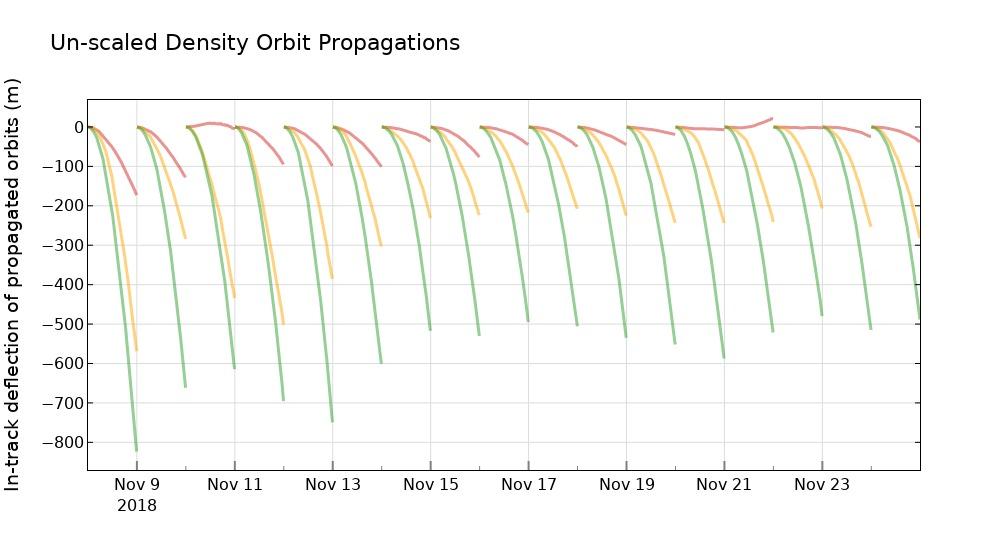

In [8]:
import plotly.graph_objects as go
from plotly.offline import plot, iplot
from plotly.subplots import make_subplots
import plotly.express as px

config = dict({
                'displayModeBar': True,
                'responsive': True,
                'staticPlot': False,
                'displaylogo': False,
                'showTips': False,
                })


fig = make_subplots(rows=1, cols=1)

for model in run_dict.keys():
    print(model)
#     col = get_plot_params(model)

#     for iarc,valarc in enumerate(obj[model]['global_params']['arc_input']):
#         day = pd.to_datetime(valarc, format='%Y.%j')

    model_m1 = obj[model]['global_params']['prms']['den_model']


#         arc = valarc+'.01'
    for ii,arc in enumerate(obj[model]['global_params']['arc_input']):
        epochstart = obj[model]['global_params']['prms']['epoch_start'][ii]
        hrs = pd.to_datetime(epochstart, format='%Y-%m-%d %H:%M:%S').hour
        frachours =(hrs/24)
        #
        if len(arc) == 9:
            maneuv_indicator = arc[8]
        else:
            maneuv_indicator = ''
        arc_type = obj[model]['global_params']['prms']['arc_type']
        if arc_type == "Nominal30hr_and_AB":
            arc_name =arc[:8]+ maneuv_indicator
        else:
            arc_name =arc[:8]+('%.3f'%frachours).lstrip('0')+ maneuv_indicator
        
    
        #---------------------------------------------------------
#         N = 50#len(obj[model]['OrbitResids'][arc]['resids']['T'])
#         convolution = np.convolve(obj[model]['OrbitResids'][arc]['resids']['T'], np.ones(N)/N, mode='full')
#         deflection = convolution[len(obj[model]['OrbitResids'][arc]['resids']['Date'])]
#         fig.add_trace(go.Scattergl(
#                     x=obj[model]['OrbitResids'][arc]['resids']['Date'],
#                     y=convolution,
#                         mode='markers+lines',
#                         opacity=1,
#                         marker=dict(size=3, color=col),
#                         showlegend=False),
#                         secondary_y=False, row=1, col=1,)
        #---------------------------------------------------------
        if model != 'novmanual_ensembleWgtAvg':
            fig.add_trace(go.Scatter(
                        x=obj[model]['OrbitResids'][arc_name]['resids']['Date'][::5],
                        y=obj[model]['OrbitResids'][arc_name]['resids']['T'][::5],
                            mode='lines',
                            opacity=0.5,
                            marker=dict(size=3, color=coldict[model_m1]),
                            line = dict(width=3, color=coldict[model_m1]),
                            showlegend=False),
                            secondary_y=False, row=1, col=1,)
#             if iarc % 2 == 0:
#                 fig.add_vrect(
#                 x0=obj[model]['OrbitResids'][arc]['resids']['Date'].values[0], 
#                 x1=obj[model]['OrbitResids'][arc]['resids']['Date'].values[-1],
#                 fillcolor="gainsboro", opacity=0.1,
#                 layer="below", line_width=0,)
#             else:
#                 pass

        else:
            fig.add_trace(go.Scatter(
                        x=obj[model]['OrbitResids'][arc_name]['resids']['Date'][::5],
                        y=obj[model]['OrbitResids'][arc_name]['resids']['T'][::5],
                            mode='lines',
                            line = dict(width=3, color=coldict[model_m1]),
                            showlegend=False),
                            secondary_y=False, row=1, col=1,)



    
# fig.add_trace(
fig.update_yaxes(title="In-track deflection of propagated orbits (m)",
                 exponentformat= 'power',
                 row=1, col=1)

# fig.update_xaxes(range=[pd.to_datetime( "181108-200000", format='%y%m%d-%H%M%S'),
#                         pd.to_datetime( "181123-040000", format='%y%m%d-%H%M%S')],
#                          row=1, col=1)

#######################################################
font_dict=dict(family='Arial',size=16,color='black')
#######################################################




for i in [1]:
    fig.update_xaxes(### LINE at axis border
                      showline=True,
                      showticklabels=True,
                      linecolor='black',
                      linewidth=1,
                     ### Major ticks
                      ticks='inside',
                      tickfont=font_dict,
                      mirror=True,
                      tickwidth=2,
                      ticklen=9,
                      tickcolor='grey',
                      tick0="2018-11-9" ,
                      dtick=86400000.0*2,    # milliseconds in a day, every 7 days
                      ### Minor Ticks
                       minor=dict(
                         dtick=86400000.0, # milliseconds in a day
                         tickwidth=1,
                         ticklen=4,
                         tickcolor='grey',
                         ticks='inside'),
                      ## GRID
                       gridcolor='gainsboro',
                       gridwidth=1,
                       layer='above traces',
                       tickangle=0,
                       row=i, col=1)
    fig.update_yaxes(showline=True,      # add line at x=0
                         showticklabels=True,
                         linecolor='black',  # line color
                         linewidth=1,        # line size
                     ticks='inside',     # ticks outside axis
                     tickfont=font_dict, # tick label font
                     mirror='allticks',  # add ticks to top/right axes
                     tickwidth=1,      # tick width
                     tickcolor='black',  # tick color
                     gridcolor='gainsboro',
                     gridwidth=1,
                     layer='above traces',
                     row=i, col=1)



fig.update_layout(title="Un-scaled Density Orbit Propagations",
                  autosize=False,    width=1000,    height=550,
                  legend= {'itemsizing': 'trace'},
                  font=font_dict,
                  plot_bgcolor='white', 
                 )
fig.update_annotations(font_size=14)  # Increase size of subplot title

fig.show(renderer="jpg",
         config=dict({
            'displayModeBar': False,
            'responsive': False,
            'staticPlot': True,
            'displaylogo': False,
            'showTips': False,
            }))
# pio.write_image(fig, '/data/SatDragModelValidation/notebooks/O2R_2023/orbit_propagations.jpg', scale=6)




In [ ]:
# %load_ext autoreload
# %autoreload 2
# from pygeodyn.PYGEODYN import Pygeodyn
# from gc import collect as gc_collect

# import pickle 
# import os


# file_raw_ICs = f"/data/SatDragModelValidation/data/inputs/sat_icesat2/g2b/"\
#           +"ICESat2_RawEphem_20181108_20181124.txt"


# dir_save    =  '/data/SatDragModelValidation/data/outputs_clean/'\
#              + 'icesat2/Paper2023_icesat2_assessment/results_withScalingFactor/'

# pickleName = '_2week_ScaledRho_OrbitProps.pkl'

# obj = {}
# for i,den in enumerate(run_list):
#     print(f"Model: {den}")
#     settings_icesat2= {# Basic input settings
#                  'satellite'      : {'input': 'icesat2'},
#                  'den_model'      : {'input': den},
#                  'run_type'       : {'input': 'OrbitPropagation'},
#                  'run_specifier'  : {'input': '_adjustCD'},
#                  'cd_model'       : {'input': 'BWDRAG'},
#                  'file_string'    : {'input': 'CD_2p5'},
#                  'model_data_path' : {'input': run_dict[den]['model_path']},
#                  # Force Model settings
#                   'cd_type'               : {'input':"Fixed_CD"},
#                   'cd_value'              : {'input':2.500000},
#                   'scaling_factor'        : {'input':False},
#                   'hours_between_cd_adj'  : {'input':24},
#                   #### Comment for unadjusted run:
#                    'cd_adjustment_boolean' : {'input':False },
# #                   'cd_adjustment_boolean' : {'input':True },
#                   #### ---------------------------------------
#                  # Run
#                   'step'           : {'input': 10.},
#                   'orbfil_step'    : {'input': 120.},
#                   'which_ICfile'   : {'input':file_raw_ICs},
#                    #    # 312-328
#                   'arc'            : {'input':[
#                                                '2018.313',
#                                                '2018.314',
#                                                '2018.315',
#                                                '2018.316',
#                                                '2018.317',
#                                                '2018.318',
#                                                '2018.319',
#                                                '2018.320',
#                                                '2018.321',
#                                                '2018.322', # failed convergence for MSIS
#                                                '2018.323',
#                                                '2018.324', # failed convergence for MSIS
#                                                '2018.325',
#                                                '2018.326',
#                                               ]},
#                   'epoch_start'    : {'input': [
#                                                 '2018-11-09 00:00:00',
#                                                 '2018-11-10 00:00:00',
#                                                 '2018-11-11 00:00:00',
#                                                 '2018-11-12 00:00:00',
#                                                 '2018-11-13 00:00:00',
#                                                 '2018-11-14 00:00:00',
#                                                 '2018-11-15 00:00:00',
#                                                 '2018-11-16 00:00:00',
#                                                 '2018-11-17 00:00:00',
#                                                 '2018-11-18 00:00:00',
#                                                 '2018-11-19 00:00:00',
#                                                 '2018-11-20 00:00:00',
#                                                 '2018-11-21 00:00:00',
#                                                 '2018-11-22 00:00:00',
#                                                ]},
#                    #
#                   'epoch_stop'     : {'input':[ 
#                                                 '2018-11-10 00:00:00',
#                                                 '2018-11-11 00:00:00',
#                                                 '2018-11-12 00:00:00',
#                                                 '2018-11-13 00:00:00',
#                                                 '2018-11-14 00:00:00',
#                                                 '2018-11-15 00:00:00',
#                                                 '2018-11-16 00:00:00',
#                                                 '2018-11-17 00:00:00',
#                                                 '2018-11-18 00:00:00',
#                                                 '2018-11-19 00:00:00',
#                                                 '2018-11-20 00:00:00',
#                                                 '2018-11-21 00:00:00',
#                                                 '2018-11-22 00:00:00',
#                                                 '2018-11-23 00:00:00',
#                                                 ]},  
#                    #
#                   'global_options' : {'input':'pso_2018'},
#                  # Request read on raw outputs
#                   'request_data'   : {'input': ['Trajectory_orbfil', 
#                                                'Density', 
# #                                                'Residuals_summary',
# #                                                'RunSummary',
# #                                                'DragFile',
# #                                                'AdjustedParams'
#                                                ]},
#               #end dict
#               }


    
# #     sat = Pygeodyn(settings_icesat2, use_file=False)
# # #     sat.run_arcs()
# #     obj[den] = sat.getData_BigData_lowmemory(orbit_propagation=True)
# # #     obj[den] = sat.getData()
# #     gc_collect()



#     pickle_file = dir_save+den+pickleName
#     if not os.path.exists(pickle_file):
#         print('Must create pickle file...')
#         print('   ',  pickle_file)
#         print('   ', 'Reading Geodyn Data')

#         ### Load the data into an object
#         sat = Pygeodyn(settings_icesat2, use_file=False)
#         obj = sat.getData_BigData_lowmemory(orbit_propagation=True)
#         gc_collect()

#         #### Pickle the object to save it
#         print('   ', 'Saving pickle')
#         filehandler = open(pickle_file, 'wb') 
#         pickle.dump(vars(obj), filehandler)
#         filehandler.close()
#         obj = 0
#         print('   ', 'Saved pickle')

# obj = {}
# for i,model in enumerate(run_list):     
#     ### Load the data if the pickles exist
#     print()
#     print()
#     gc_collect()

#     pickle_file = dir_save+model+pickleName

#     filehandler = open(pickle_file, 'rb') 
#     obj[model] = pickle.load(filehandler)
#     filehandler.close()
#     print('Loaded data from pickle... ', model)



In [ ]:
# input_arcs[7:24]

In [ ]:
# 3

## plots

In [ ]:
# for model in run_dict.keys():
#     print(model)    
#     manual_density_file ="/data/SatDragModelValidation/data/outputs_clean/icesat2/"\
#                         +"O2R2023_longimeperiod/AGU2023/" \
#                         +f"ScaledRho_24hrArcs_manual{model}.txt"

#     f = open(manual_density_file, "w")
#     f.write("\n")
#     f.close()
#     with open(manual_density_file, 'r+') as file:
#         for i,val in enumerate(models_dens[model]['dates']):
#             file.write(f"{models_dens[model]['dates'][i].strftime('%y%m%d%H%M%S')}  "\
#                  +f"{models_dens[model]['denscaled'][i]:15.6e}\n")


        
# ### SAVE THE ENSEMBLE WEIGHTED AVERAGE DENSITY
# manual_density_file ="/data/SatDragModelValidation/data/outputs_clean/icesat2/"\
#                     +"O2R2023_longimeperiod/AGU2023/" \
#                     +f"ScaledRho_24hrArcs_manual{'ensembleWgtAvg'}.txt"
# f = open(manual_density_file, "w")
# f.write("\n")
# f.close()
# with open(manual_density_file, 'r+') as file:
#     for i,val in enumerate(df['dates'].values):
#         file.write(f"{df['dates'][i].strftime('%y%m%d%H%M%S')}  "\
#              +f"{rho_scaledEnsembleAvg[i]:15.6e}\n")
        
        
        
